## What is important?
- It doesn't look like distance to closest busstop, number of stores less than 100 and 1000 meters from the store has any significant impact on the revenue
- Could be that it combined with some of the other features has a lot to say

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [184]:
stores = pd.read_csv('../../own_data/stores.csv').rename(columns={"Unnamed: 0": "dataset", "Unnamed: 1": "range_index"}).set_index(["dataset", "range_index"])

In [185]:
stores_train = stores.loc["train"]

In [175]:
def rounded(x, precision=0):
    """
        Takes a number and rounds with number of digits - precision
    """
    if x == 0:
        return 0
    return round(x, -int(np.log10(x)-precision))
dist_buss = stores_train.sort_values('distance_closest_busstop')
dist_buss['distance_closest_busstop'] = dist_buss['distance_closest_busstop'].apply(rounded, precision=1)




<AxesSubplot:xlabel='distance_closest_busstop', ylabel='revenue'>

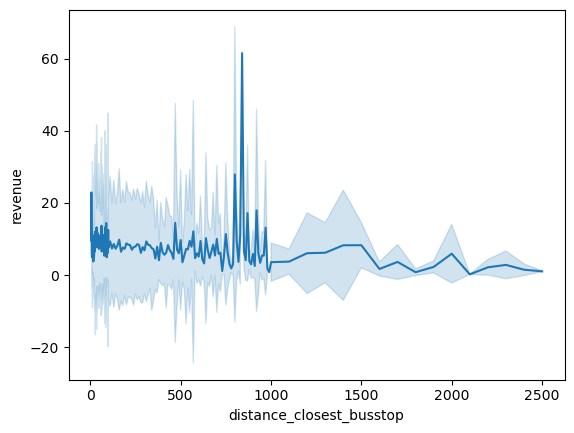

In [172]:
# slice avoid points with busstops far avoid as there are few of those
sns.lineplot(data=dist_buss[:-100], x="distance_closest_busstop", y="revenue", ci="sd")

In [189]:
num_stores_100 = stores_train.sort_values('other_stores_100')
num_stores_1000 = stores_train.sort_values('other_stores_1000')
num_stores_1000['other_stores_1000'] = num_stores_1000['other_stores_1000'].apply(rounded, precision=1)


<AxesSubplot:xlabel='other_stores_1000', ylabel='revenue'>

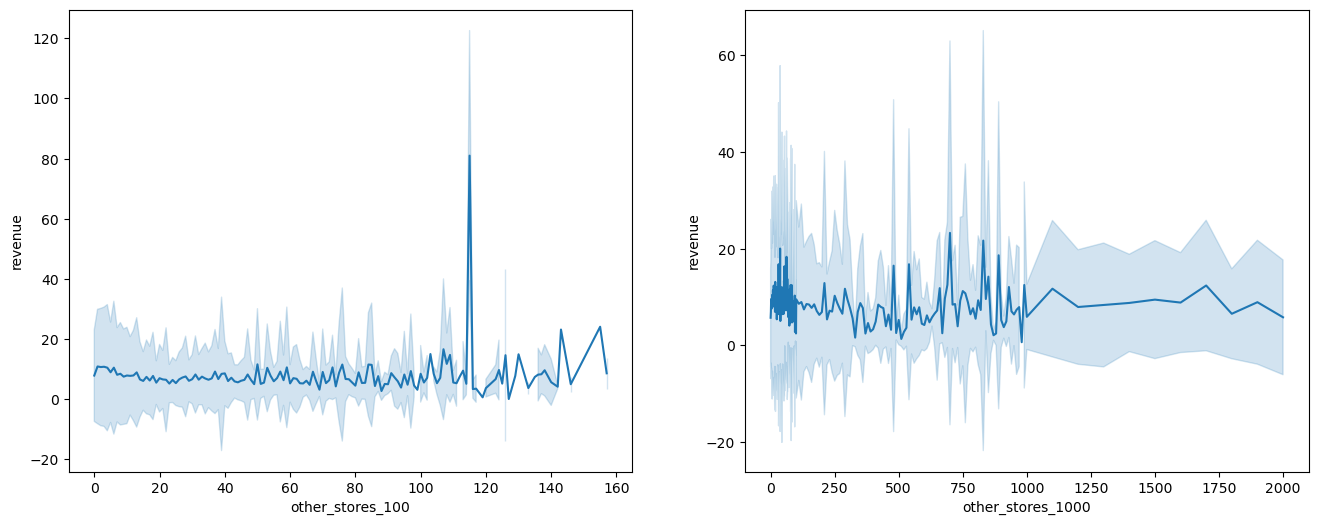

In [190]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.lineplot(ax=axs[0], data=num_stores_100[:-100], x="other_stores_100", y="revenue", ci="sd")
sns.lineplot(ax=axs[1], data=num_stores_1000[:-100], x="other_stores_1000", y="revenue", ci="sd")


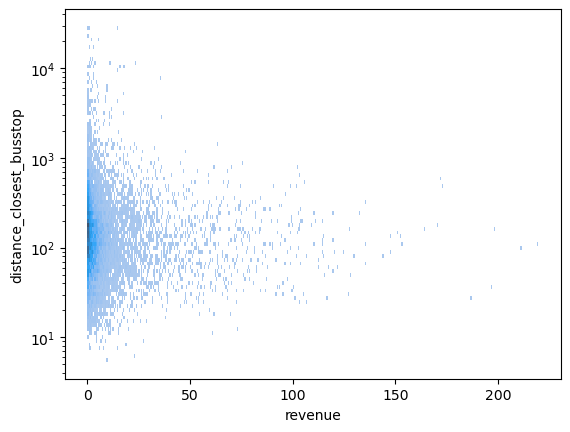

In [84]:
s_dist = sns.histplot(stores_train, x='revenue', y="distance_closest_busstop", log_scale=(False, True))

In [ ]:
sns.displot(stores_train, x='revenue', hue="other_stores_100")